<a href="https://colab.research.google.com/github/rahiakela/python-for-programmers-practice/blob/object-oriented-programming/time_series_with_simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series with Simple Linear Regression

## Motivation

We’ll discuss time series, which are sequences of values (called observations) associated with points in time. Some examples are:-
* daily closing stock prices, 
* hourly temperature readings, 
* the changing positions of a plane in flight, 
* annual crop yields and
* quarterly company profits. 

Perhaps the ultimate time series is the stream of time-stamped tweets coming from Twitter users worldwide.

In this section, we’ll use a technique called simple linear regression to make predictions from time series data. We’ll use the 1895 through 2018 January average high temperatures in New York City to predict future average January high temperatures and to estimate the average January high temperatures for years preceding 1895.

This would be our through practical guide as follow:-
* In the **Machine Learning** using the scikit-learn library
* In the **Deep Learning** using recurrent neural networks (RNNs) to analyze time series

## Time Series

The data we’ll use is a time series in which the observations are ordered by year.
* **Univariate** - time series have one observation per time, such as the average of the January high temperatures in New York City for a particular year.

* **Multivariate** - time series have two or more observations per time, such as temperature, humidity and barometric pressure readings in a weather application. 

Here, we’ll analyze a univariate time series.

Two tasks often performed with time series are:
* **Time series analysis** - which looks at existing time series data for patterns, helping data analysts understand the data. A common analysis task is to look for seasonality in the data.
* **Time series forecasting** - which uses past data to predict the future.

We’ll perform time series forecasting in this section.

## Simple Linear Regression

Using a technique called simple linear regression, we’ll make predictions by finding a linear relationship between the months (January of each year) and New York City’s average January high temperatures.

Given a collection of values representing:-
* **Independent variable** - (the month/year combination) and 
* **Dependent variable** - (the average high temperature for that month/year), 

Simple linear regression describes the relationship between these variables with a straight line, known as the regression line.

## Linear Relationships

To understand the general concept of a linear relationship, consider Fahrenheit and Celsius temperatures. Given a Fahrenheit temperature, we can calculate the corresponding Celsius temperature using the following formula:

$$c = 5 / 9 * (f - 32)$$

In this formula:-
* **f** (the Fahrenheit temperature) is the independent variable, and
* **c** (the Celsius temperature) is the dependent variable

Each value of **c** depends on the value of **f** used in the calculation.

In [0]:
c = lambda f: 5 / 9 * (f - 32)
temp = [(f, c(f)) for f in range(0, 101, 10)]

Let's plot to display the linear relationship between the Fahrenheit and Celsius temperatures.

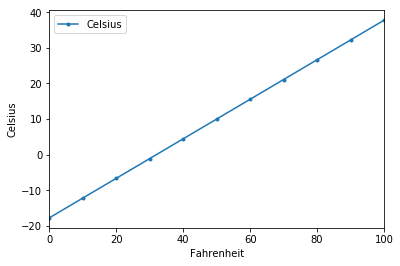

In [2]:
import pandas as pd
 
temps_df = pd.DataFrame(temp, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## Components of the Simple Linear Regression Equation

The points along any straight line (in two dimensions) like those shown in the preceding graph can be calculated with the equation:

$$y = mx + b$$

where
  * m is the line’s slope
  * b is the line’s intercept with the y-axis (at x = 0)
  * x is the independent variable (the date in this example), and
  * y is the dependent variable (the temperature in this example).

In simple linear regression, y is the predicted value for a given x.  

## Data Preparation & Analysis

### Loading the Average High Temperatures into a DataFrame

In [3]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [4]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Cleaning the Data

In [5]:
# rename column label
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.head()

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [6]:
# let’s check the column’s type
nyc.Date.dtype

dtype('int64')

The values are integers, so we can divide by 100 to truncate the last two digits. 

Recall that each column in a DataFrame is a Series. Calling Series method floordiv performs integer division on every element of the Series

In [7]:
nyc.Date = nyc.Date.floordiv(100)
nyc.head()

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


### Calculating Basic Descriptive Statistics for the Dataset

In [8]:
pd.set_option('precision', 2)

nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

## Forecasting Future Average High Temperatures

The SciPy (Scientific Python) library is widely used for engineering, science and math in Python. Its stats module provides function linregress, which calculates a regression line’s slope and intercept for a given set of data points.

In [0]:
from scipy import stats

linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

Function linregress receives two one-dimensional arrays of the same length representing the data points’ x- and y-coordinates. The keyword arguments x and y represent the independent and dependent variables, respectively. 

The object returned by linregress contains the regression line’s slope and intercept

In [11]:
linear_regression.slope

0.014771361132966163

In [12]:
linear_regression.intercept

8.694993233674289

We can use these values with the simple linear regression equation for a straight line, $$y = mx + b$$ to predict the average January temperature in New York City for a given year. 

Let’s predict the average Fahrenheit temperature for January of 2019. In the following calculation, linear_regression.slope is m, 2019 is x (the date value for which you’d like to predict the temperature) and linear_regression.intercept is b.

In [13]:
linear_regression.slope * 2019 + linear_regression.intercept

38.51837136113297

We also can approximate what the average temperature might have been in the years before 1895.
 
For example, let’s approximate the average temperature for January of 1890.

In [15]:
linear_regression.slope * 1890 + linear_regression.intercept

36.612865774980335

## Plotting the Average High Temperatures and a Regression Line

let’s use Seaborn’s regplot function to plot each data point with the dates on the x-axis and the temperatures on the y-axis. The regplot function creates the scatter plot or scattergram in which the scattered dots represent the Temperatures for the given Dates, and the straight line displayed through the points is the regression line.

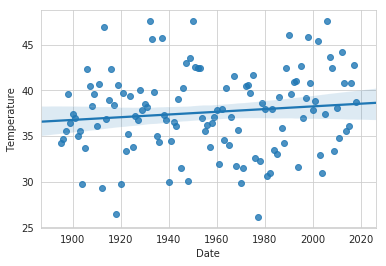

In [18]:
import seaborn as sns

sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y = nyc.Temperature)

In the preceding graph, this is purely an issue of the graph’s height—Seaborn and Matplotlib auto-scale the axes, based on the data’s range of values.

We can scale the y-axis range of values to emphasize the linear relationship. Here, we scaled the y-axis from a 21.5-degree range to a 60-degree range (from 10 to 70 degrees).

(10, 70)

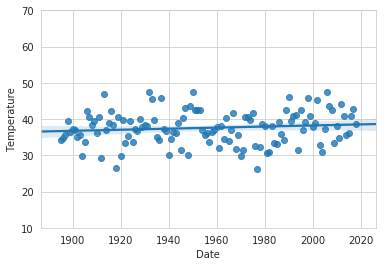

In [22]:
axes = sns.regplot(x=nyc.Date, y = nyc.Temperature)
axes.set_ylim(10, 70)